# Analyzing Emotional Language in Center, Left, and Right News

The following notebook uses a bag of words approach and the NRCLex package to calculate the percentage of words in each news corpus that are associated with the following emotions: `fear, anger, trust, surprise, positive, negative, sadness, disgust, joy, anticipation`. NRCLex refers to this as "emotional affect" and uses a dictionary of 27,000 labeled words. Preprocessing for this notebook can be found [here]() and the lexicon can be found [here](https://github.com/metalcorebear/NRCLex/blob/master/nrclex.py)

## Implications for Creators and Strategists

This approach can, like the moral foundations word, help tailor word choice for specific audience. In the case of the political news dataset, right leaning news generally uses slightly more fear, anger, negative and disgust related language and less trust, positive, anticipation, and joy language. For this type of analysis, a comparison group is essential to derive meaning. For example, if we are designing for a left leaning audience, we might want to use more positive, joy, and anticipation-related language. But we can only know this by comparing it to content designed for a right leaning audience.

## General Observations

- Positive words compose the greatest share of news articles across all three bias groups
- Trust and negative-related words compose the second and third most common categories of words, with right news being about 1 percentage point greater than left news
- No bias group differs from another bias group on any emotion by more than 1.35 percentage points
- The greatest and/or most notable differences(more than .5 percentage points) are described below. Each difference is described in percentage points, which describes how for how the percent of each emotional language category differs between center right, center left and left right. For example, when the center has 1.35 percentage points more "anticipation" language, this means center news uses more anticipation language relative to right or left anticipation language:

    - *Anticipation*: Center is 1.35  points higher than right, left is 1.05  points higher than right
    - *Fear*: Center and left are both 0.85  points lower than right
    - *Anger*: Center is 1.03 points lower than right, and left is .9 points lower than right
    - *Trust*: Center and left higher than right by 0.64 and 0.46 points respectively
    - *Positive*: Center and left higher than right by 1.15 and 1.63 points respectively, with 1.63 being the greatest difference between any two bias groups
    - *Negative*: Center is 0.89 points higher than left, while left is 1.13 lower than right
    - *Disgust*: Center and left lower than right by 0.86 and 0.69 points respectively
    - *Joy*: Left uses 0.56 points more than right
    
**We can also frame this analysis around the audience bias groups:**

#### Center News
- Uses less fear, anger, and disgust related language than the right
- Uses more trust, positive, and anticipation language than the right and more negative language than the left

#### Left News
- Uses more negative language than center news
- Uses less fear, anger, negative, and disgust language than the right
- Uses more positive, joy, and anticipation language than the right

#### Right News

- Uses more fear, anger, and disgust language than center and left
- Uses more negative language than the left
- Uses less trust language than center
- Uses less positive and anticipation language than center and left
- Uses less joy language than the left






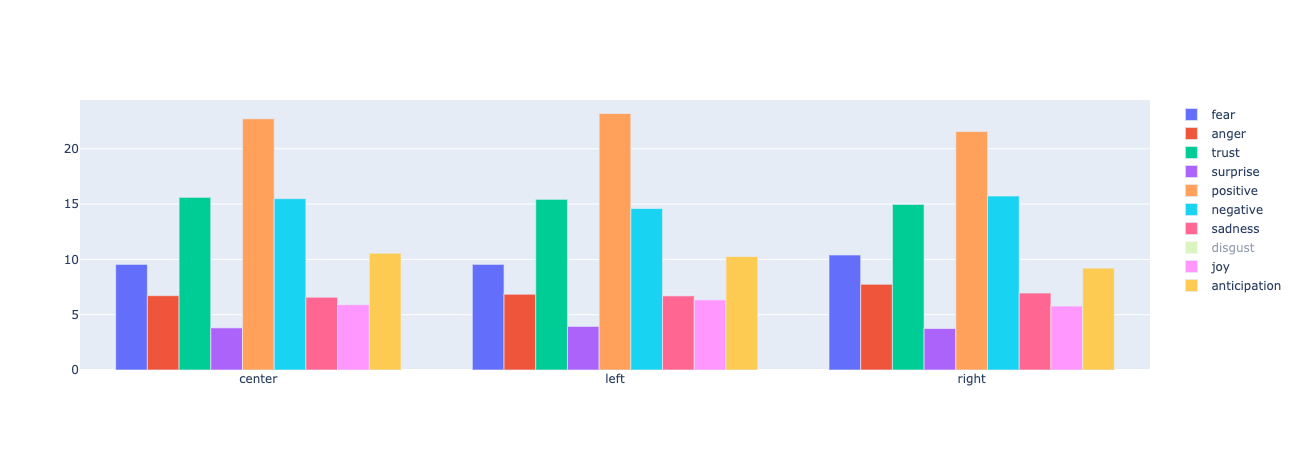

In [71]:
fig.update_layout(barmode='group')
fig.show()

In [87]:
diffs

,center_right_diff,cent_left_dff,left_right_dff
fear,-0.85,0.00,-0.85
anger,-1.03,-0.13,-0.90
trust,0.64,0.18,0.46
surprise,0.06,-0.13,0.19
positive,1.15,-0.48,1.63
negative,-0.24,0.89,-1.13
sadness,-0.38,-0.12,-0.26
disgust,-0.86,-0.17,-0.69
joy,0.12,-0.44,0.56
anticipation,1.35,0.30,1.05


# Code

## Imports and installs

In [2]:
import pandas as pd

import plotly.graph_objects as go

!pip install plotly

import plotly.express as px

In [4]:
pd.set_option('display.max_columns', 500)

## Data Loading and Transformations

In [3]:
df = pd.read_csv('~/data/political_news_emotions.csv')

In [12]:
emotions = ['fear', 'anger', 
       'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust',
       'joy', 'anticipation',]

In [88]:
emotions_bias = df.groupby('audience_combined_bias')[emotions].mean()

emotions_bias = emotions_bias.round(4)*100

emotions_bias

,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
audience_combined_bias,,,,,,,,,,
center,9.55,6.72,15.61,3.81,22.71,15.49,6.58,3.18,5.90,10.56
left,9.55,6.85,15.43,3.94,23.19,14.60,6.70,3.35,6.34,10.26
right,10.40,7.75,14.97,3.75,21.56,15.73,6.96,4.04,5.78,9.21


In [80]:
cent_right_diff = emotions_bias.loc['center'] - emotions_bias.loc['right']

cent_left_diff = emotions_bias.loc['center'] - emotions_bias.loc['left']

left_right_diff = emotions_bias.loc['left'] - emotions_bias.loc['right']

In [86]:
diffs = pd.concat([cent_right_diff, cent_left_diff, left_right_diff], axis=1)
diffs.columns = ['center_right_diff', 'cent_left_dff', 'left_right_dff']
diffs

,center_right_diff,cent_left_dff,left_right_dff
fear,-0.85,0.00,-0.85
anger,-1.03,-0.13,-0.90
trust,0.64,0.18,0.46
surprise,0.06,-0.13,0.19
positive,1.15,-0.48,1.63
negative,-0.24,0.89,-1.13
sadness,-0.38,-0.12,-0.26
disgust,-0.86,-0.17,-0.69
joy,0.12,-0.44,0.56
anticipation,1.35,0.30,1.05


## Plotting

In [69]:
fig_list = []
for emo in emotions:
    fig_list.append(go.Bar(name=emo, x=emotions_bias.index, y=emotions_bias[emo]))

In [70]:
fig = go.Figure(data=fig_list)